In [1]:
import pandas as pd
import nltk
nltk.download('stopwords')
nltk.download('punkt')
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
from string import punctuation
custom = stop_words+list(punctuation)
from nltk.stem import WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()
nltk.download('wordnet')
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Acer\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Acer\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Acer\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [2]:
df = pd.read_csv("Consumer_Complaints.csv",encoding = 'ISO-8859-1')
df.head()
df = df.drop(['Unnamed: 18'],1)

### Data information

In [3]:
# Information

print('Dataframe shape:\n',df.shape,'\n\n')
print('Info:\n',df.info(),'\n','\n')
print('Class counts:\n\n',df['Product'].value_counts(),'\n\n')
print('Null Values\n\n',df.isnull().sum(),'\n\n')
print('Columns:\n',df.columns)

Dataframe shape:
 (1025010, 18) 


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025010 entries, 0 to 1025009
Data columns (total 18 columns):
Date received                   1025010 non-null object
Product                         1025010 non-null object
Sub-product                     789840 non-null object
Issue                           1025010 non-null object
Sub-issue                       528853 non-null object
Consumer Complaint              277814 non-null object
Company Public Response         318364 non-null object
Company                         1025010 non-null object
State                           1012650 non-null object
ZIP code                        1008292 non-null object
Tags                            141588 non-null object
Consumer consent provided?      491911 non-null object
Submitted via                   1025010 non-null object
Date Sent to Company            1025010 non-null object
Company Response to Consumer    1025007 non-null object
Timely response?  

In [34]:
# tokenizer function

def my_tokenizer(s):
    try:
        s = s.lower() # downcase
    except:
        s = str(s).lower()
    tokens = nltk.word_tokenize(s) # split string into words (tokens)
    tokens = [t for t in tokens if len(t) > 2] # remove short words, they're probably not useful
    tokens = [wordnet_lemmatizer.lemmatize(t) for t in tokens] # put words into base form
    tokens = [t for t in tokens if t not in custom] # remove stopwords
    tokens = [t for t in tokens if not any(c.isdigit() for c in t)] # remove any digits, i.e. "3rd edition"
    return tokens

In [16]:
def Preprocessing(df1, column_1):    #column_1 - reviews/msgs/complaints, column_2 - class/sentiments/Products
    
    # Remove Null values
    df1.dropna(inplace = True)
    
    # Convert to list and tokenize
    text = df1[column_1].tolist()
    cleaned_text = []
    for x in text:
        cleaned_text.append(my_tokenizer(x))

    
    return cleaned_text

In [17]:
text = Preprocessing(df, 'Consumer Complaint')

### Web scrapping


In [23]:
!pip install bs4
import warnings
warnings.filterwarnings("ignore")

# !pip install bs4
import urllib.request
from bs4 import BeautifulSoup
query = input("Enter company name ")
query = query.replace(" ","+")
url = "http://www.google.com/search?q="+str(query)
print (url)
req = urllib.request.Request(url, headers={'User-Agent' : "Magic Browser"})
response = urllib.request.urlopen( req )
html = response.read()
soup = BeautifulSoup(html, 'html.parser')
import re
all_links=[]
for link in soup.findAll('a'):
    all_links.append(link.get('href'))

  Created wheel for bs4: filename=bs4-0.0.1-cp37-none-any.whl size=1278 sha256=db7a1f84e58ec47bd94250474078751239c5f6f197182b1214d73b8546a1b2ce
  Stored in directory: C:\Users\Acer\AppData\Local\pip\Cache\wheels\a0\b0\b2\4f80b9456b87abedbc0bf2d52235414c3467d8889be38dd472
Successfully built bs4
Enter company name Natural language processing
http://www.google.com/search?q=Natural+language+processing


In [24]:
print(len(all_links))
all_links[0]

76


'/?sa=X&ved=0ahUKEwjN37TZ8e3lAhWMo48KHXT0DS0QOwgC'

In [27]:
imp_links = []
for x in all_links:
    if x.startswith("/url"):
        imp_links.append(x)
print(len(imp_links))
imp_links[0]

19


'/url?q=https://en.wikipedia.org/wiki/Natural_language_processing&sa=U&ved=2ahUKEwjN37TZ8e3lAhWMo48KHXT0DS0QFnoECAsQBA&usg=AOvVaw0I9ylWLOMIzDgh_2y6RCrh'

In [29]:
final_links = []
for x in imp_links:
    final_links.append("https://google.com"+x)
print(len(final_links))
final_links[0]


19


'https://google.com/url?q=https://en.wikipedia.org/wiki/Natural_language_processing&sa=U&ved=2ahUKEwjN37TZ8e3lAhWMo48KHXT0DS0QFnoECAsQBA&usg=AOvVaw0I9ylWLOMIzDgh_2y6RCrh'

In [30]:
text=[]
for i in range(len(final_links)):
    req = urllib.request.Request(final_links[i],headers = {'User-Agent' : 'Magic Browser'})
    response = urllib.request.urlopen(req)
    html = response.read()
    soup = BeautifulSoup(html,'lxml')
    for j in range(len(soup.find_all('p'))):
        text.append(soup.find_all('p')[j].get_text())

In [31]:
len(text)

697

In [36]:
text

['Natural language processing (NLP) is a subfield of linguistics, computer science, information engineering, and artificial intelligence concerned with the interactions between computers and human (natural) languages, in particular how to program computers to process and analyze large amounts of natural language data.\n',
 'Challenges in natural language processing frequently involve speech recognition, natural language understanding, and natural language generation.\n',
 'The history of natural language processing (NLP) generally started in the 1950s, although work can be found from earlier periods.\nIn 1950, Alan Turing published an article titled "Computing Machinery and Intelligence" which proposed what is now called the Turing test as a criterion of intelligence[clarification needed].\n',
 'The Georgetown experiment in 1954 involved fully automatic translation of more than sixty Russian sentences into English. The authors claimed that within three or five years, machine translatio

In [35]:
final_text = [my_tokenizer(s) for s in text]

### LDA on web data

In [38]:
import gensim
from gensim.corpora import dictionary
from gensim import corpora
from pprint import pprint

id2word = corpora.Dictionary(final_text)

mycorpus = [id2word.doc2bow(s) for s in final_text]

lda_model = gensim.models.ldamodel.LdaModel(corpus=mycorpus,
                                           id2word=id2word,
                                           num_topics=8, 
                                           random_state=42,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha='auto',
                                           per_word_topics=True)

In [39]:
pprint(lda_model.print_topics())

[(0,
  '0.021*"text" + 0.021*"data" + 0.019*"model" + 0.015*"algorithm" + '
  '0.013*"tree" + 0.012*"parse" + 0.012*"based" + 0.012*"one" + 0.011*"way" + '
  '0.011*"thing"'),
 (1,
  '0.018*"system" + 0.018*"want" + 0.015*"work" + 0.015*"great" + 0.012*"idea" '
  '+ 0.011*"see" + 0.010*"using" + 0.010*"algorithm" + 0.010*"data" + '
  '0.010*"field"'),
 (2,
  '0.036*"nlp" + 0.025*"language" + 0.020*"learning" + 0.019*"machine" + '
  '0.016*"use" + 0.014*"word" + 0.014*"sentence" + 0.013*"like" + 0.012*"task" '
  '+ 0.011*"english"'),
 (3,
  '0.031*"lot" + 0.029*"topic" + 0.019*"know" + 0.015*"..." + 0.014*"help" + '
  '0.013*"find" + 0.012*"project" + 0.009*"resolution" + 0.009*"london" + '
  '0.009*"right"'),
 (4,
  '0.028*"london" + 0.024*"get" + 0.023*"python" + 0.018*"spacy" + '
  '0.017*"library" + 0.014*"http" + 0.014*"start" + 0.012*"capital" + '
  '0.011*"course" + 0.010*"sheet"'),
 (5,
  '0.063*"language" + 0.045*"natural" + 0.032*"processing" + 0.021*"nlp" + '
  '0.019*"human"

In [40]:
doc_lda = lda_model[mycorpus]

In [41]:
print('\nPerplexity: ', lda_model.log_perplexity(mycorpus)) 
from gensim.models import CoherenceModel
coherence_model_lda = CoherenceModel(model=lda_model, texts=final_text, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Perplexity:  -7.609877562088082

Coherence Score:  0.3969295670616164


In [43]:
!pip install pyLDAvis
import os
import pyLDAvis
import pyLDAvis.gensim  # don't skip this
import matplotlib.pyplot as plt
%matplotlib inline

pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model, mycorpus, id2word)
vis

  Created wheel for pyLDAvis: filename=pyLDAvis-2.1.2-py2.py3-none-any.whl size=97715 sha256=09834e7ac55d723f0dfd7ec940195f50e33cb9bf0603e6499c597fc7620ebb51
  Stored in directory: C:\Users\Acer\AppData\Local\pip\Cache\wheels\98\71\24\513a99e58bb6b8465bae4d2d5e9dba8f0bef8179e3051ac414
Successfully built pyLDAvis


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
2      0.252713  0.020698       1        1  27.797785
7      0.027155  0.276709       2        1  15.534157
0      0.016873 -0.076166       3        1  15.274380
1      0.033994 -0.144577       4        1  12.373361
5      0.099975 -0.071983       5        1  11.352110
4     -0.163874 -0.010521       6        1   7.176317
3     -0.165626  0.007469       7        1   5.305256
6     -0.101210 -0.001629       8        1   5.186627, topic_info=     Category        Freq      Term       Total  loglift  logprob
363   Default  204.000000      word  204.000000  30.0000  30.0000
11    Default  199.000000  language  199.000000  29.0000  29.0000
14    Default  103.000000   natural  103.000000  28.0000  28.0000
15    Default  180.000000       nlp  180.000000  27.0000  27.0000
80    Default  150.000000  sentence  150.000000  26.0000  26.0000
...       ...         ...       ...         ...      ...      ...
89     Topic8    6.208579        wa   38.322517   1.1390  -4.7246
2840   Topic8    3.429162      bird    8.821903   2.0142  -5.3182
2841   Topic8    3.429162     grain    8.821903   2.0142  -5.3182
441    Topic8    4.839072      text  107.335793  -0.1402  -4.9738
346    Topic8    3.453029  question   12.439169   1.6775  -5.3113

[390 rows x 6 columns], token_table=      Topic      Freq       Term
term                            
1971      7  0.930963        ...
1532      7  0.807077    ability
239       4  0.923248       able
2401      5  0.923385     access
626       8  0.893349  according
...     ...       ...        ...
158       6  0.878879      write
129       3  0.805411    written
129       6  0.172588    written
92        1  0.946029       year
541       7  0.862729        yet

[480 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[3, 8, 1, 2, 6, 5, 4, 7])

In [44]:
def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=3):
    """
    Compute c_v coherence for various number of topics

    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    texts : List of input texts
    limit : Max num of topics

    Returns:
    -------
    model_list : List of LDA topic models
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model = gensim.models.ldamodel.LdaModel(corpus=mycorpus, num_topics=num_topics, id2word=id2word)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

In [45]:
model_list, coherence_values = compute_coherence_values(dictionary=id2word, corpus=mycorpus, texts=final_text, start=2, limit=40, step=6)

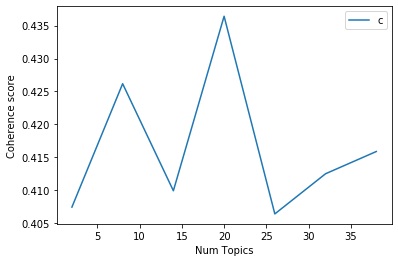

In [46]:
limit=40; start=2; step=6;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

In [47]:
for m, cv in zip(x, coherence_values):
    print("Num Topics =", m, " has Coherence Value of", round(cv, 4))

Num Topics = 2  has Coherence Value of 0.4074
Num Topics = 8  has Coherence Value of 0.4262
Num Topics = 14  has Coherence Value of 0.4099
Num Topics = 20  has Coherence Value of 0.4364
Num Topics = 26  has Coherence Value of 0.4064
Num Topics = 32  has Coherence Value of 0.4125
Num Topics = 38  has Coherence Value of 0.4159


In [49]:
optimal_model = model_list[3]
model_topics = optimal_model.show_topics(formatted=False)
pprint(optimal_model.print_topics(num_words=10))

[(0,
  '0.014*"word" + 0.011*"sentence" + 0.009*"data" + 0.008*"term" + 0.007*"wa" '
  '+ 0.006*"example" + 0.006*"language" + 0.006*"understanding" + 0.005*"like" '
  '+ 0.005*"poetry"'),
 (1,
  '0.027*"language" + 0.014*"natural" + 0.013*"learning" + 0.012*"nlp" + '
  '0.011*"machine" + 0.010*"word" + 0.009*"use" + 0.008*"model" + '
  '0.008*"processing" + 0.007*"deep"'),
 (2,
  '0.015*"data" + 0.012*"system" + 0.010*"language" + 0.010*"computational" + '
  '0.009*"linguistics" + 0.009*"natural" + 0.008*"wa" + 0.008*"processing" + '
  '0.008*"input" + 0.008*"model"'),
 (3,
  '0.012*"language" + 0.011*"text" + 0.010*"algorithm" + 0.009*"data" + '
  '0.009*"input" + 0.009*"natural" + 0.007*"different" + 0.006*"nlp" + '
  '0.006*"co-reference" + 0.006*"play"'),
 (4,
  '0.015*"word" + 0.012*"published" + 0.010*"ha" + 0.009*"first" + '
  '0.008*"like" + 0.007*"system" + 0.007*"..." + 0.006*"rule" + '
  '0.005*"company" + 0.005*"road"'),
 (5,
  '0.022*"word" + 0.020*"language" + 0.013*"nat

In [50]:
import pandas as pd
def format_topics_sentences(ldamodel=lda_model, corpus=mycorpus, texts=text):
    # Init output
    sent_topics_df = pd.DataFrame()

    # Get main topic in each document
    for i, row in enumerate(ldamodel[corpus]):
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        # Get the Dominant topic, Perc Contribution and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
            else:
                break
    sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']

    # Add original text to the end of the output
    contents = pd.Series(texts)
    sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
    return(sent_topics_df)


df_topic_sents_keywords = format_topics_sentences(ldamodel=optimal_model, corpus=mycorpus, texts=final_text)

# Format
df_dominant_topic = df_topic_sents_keywords.reset_index()
df_dominant_topic.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text']

# Show
df_dominant_topic.head(10)

,Document_No,Dominant_Topic,Topic_Perc_Contrib,Keywords,Text
0,0,6.0,0.9672,"language, natural, processing, system, human, ...","[natural, language, processing, nlp, subfield,..."
1,1,6.0,0.9367,"language, natural, processing, system, human, ...","[challenge, natural, language, processing, fre..."
2,2,8.0,0.9672,"language, nlp, learning, natural, processing, ...","[history, natural, language, processing, nlp, ..."
3,3,11.0,0.9827,"wa, translation, machine, part, nlp, word, sta...","[georgetown, experiment, involved, fully, auto..."
4,4,6.0,0.9824,"language, natural, processing, system, human, ...","[notably, successful, natural, language, proce..."
5,5,15.0,0.9736,"nlp, word, language, human, system, data, many...","[many, programmer, began, write, conceptual, o..."
6,6,6.0,0.5169,"language, natural, processing, system, human, ...","[natural, language, processing, system, based,..."
7,7,14.0,0.9866,"language, nlp, learning, machine, natural, pro...","[many, notable, early, success, occurred, fiel..."
8,8,9.0,0.9852,"data, learning, nlp, language, algorithm, leve...","[recent, research, ha, increasingly, focused, ..."
9,9,1.0,0.8820,"language, natural, learning, nlp, machine, wor...","[representation, learning, deep, neural, netwo..."


In [51]:
# Display setting to show more characters in column
pd.options.display.max_colwidth = 100

sent_topics_sorteddf_mallet = pd.DataFrame()
sent_topics_outdf_grpd = df_topic_sents_keywords.groupby('Dominant_Topic')

for i, grp in sent_topics_outdf_grpd:
    sent_topics_sorteddf_mallet = pd.concat([sent_topics_sorteddf_mallet, 
                                             grp.sort_values(['Perc_Contribution'], ascending=False).head(1)], 
                                            axis=0)

# Reset Index    
sent_topics_sorteddf_mallet.reset_index(drop=True, inplace=True)

# Format
sent_topics_sorteddf_mallet.columns = ['Topic_Num', "Topic_Perc_Contrib", "Keywords", "Representative Text"]

# Show
sent_topics_sorteddf_mallet.head(10)

,Topic_Num,Topic_Perc_Contrib,Keywords,Representative Text
0,0.0,0.9884,"word, sentence, data, term, wa, example, language, understanding, like, poetry","[ross, goodwin, former, ghostwriter, obama, administration, creative, technologist, ha, often, u..."
1,1.0,0.9905,"language, natural, learning, nlp, machine, word, use, model, processing, deep","[nlu, post-processing, text, use, nlp, algorithm, identifying, parts-of-speech, etc, utilizes, c..."
2,2.0,0.9847,"data, system, language, computational, linguistics, natural, wa, processing, input, model","[emulating, jack, kerouac, novel, road, ross, goodwin, traveled, new, york, new, orleans, march,..."
3,3.0,0.9750,"language, text, algorithm, data, input, natural, different, nlp, co-reference, play","[royal, bank, scotland, us, text, analytics, nlp, technique, extract, important, trend, customer..."
4,4.0,0.9762,"word, published, ha, first, like, system, ..., rule, company, road","[company, like, winterlight, lab, making, huge, improvement, treatment, alzheimer, disease, moni..."
5,5.0,0.9793,"word, language, natural, ha, computer, processing, form, rule, linguistics, speech","[program, student, written, daniel, bobrow, phd, dissertation, mit, one, earliest, known, attemp..."
6,6.0,0.9860,"language, natural, processing, system, human, rule, nlp, word, machine, statistical","[many, different, class, machine-learning, algorithm, applied, natural-language-processing, task..."
7,7.0,0.9762,"sentence, workshop, nlp, need, text, understand, tree, start, break, algorithm","[nlp, particularly, booming, healthcare, industry, technology, improving, care, delivery, diseas..."
8,8.0,0.9774,"language, nlp, learning, natural, processing, approach, machine, task, deep, intelligence","[supervised, unsupervised, learning, specifically, deep, learning, widely, used, modeling, human..."
9,9.0,0.9852,"data, learning, nlp, language, algorithm, level, system, model, sheet, cheat","[recent, research, ha, increasingly, focused, unsupervised, semi-supervised, learning, algorithm..."


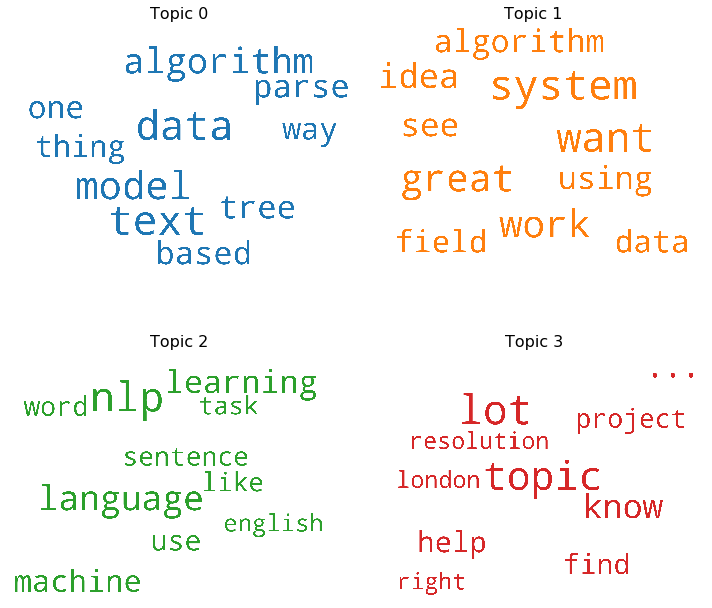

In [54]:

from matplotlib import pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import matplotlib.colors as mcolors

cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]  # more colors: 'mcolors.XKCD_COLORS'

cloud = WordCloud(stopwords=custom,
                  background_color='white',
                  width=2500,
                  height=1800,
                  max_words=10,
                  colormap='tab10',
                  color_func=lambda *args, **kwargs: cols[i],
                  prefer_horizontal=1.0)

topics = lda_model.show_topics(formatted=False)

fig, axes = plt.subplots(2, 2, figsize=(10,10), sharex=True, sharey=True)

for i, ax in enumerate(axes.flatten()):
    fig.add_subplot(ax)
    topic_words = dict(topics[i][1])
    cloud.generate_from_frequencies(topic_words, max_font_size=300)
    plt.gca().imshow(cloud)
    plt.gca().set_title('Topic ' + str(i), fontdict=dict(size=16))
    plt.gca().axis('off')


plt.subplots_adjust(wspace=0, hspace=0)
plt.axis('off')
plt.margins(x=0, y=0)
plt.tight_layout()
plt.show()